# Predicting Heart Disease using Machine Learning

This notebooks uses various Python-based machine learning modules to predict heart disease based on medical attributes.

We will take the following approach:
1. Problem definition
2. Data
3. Define Evaluation Metrics
4. Define Features
5. Modeling
6. Experimentation

## 1. Problem Definition

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

We will work with the University of California, Irvine heart disease dataset, imported from Kaggle.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept phase, we will move forward with this project.

## 4. Features

This data set describes the following features:

* id - Unique id for each patient
* age - Age of the patient in years
* origin - place where study took place
* sex
    * Male
    * Female
* cp chest pain type
    * typical angina
    * atypical angina
    * non-anginal
    * asymptomatic
* trestbps resting blood pressure - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholesterol in mg/dl
* fbs - if fasting blood sugar > 120 mg/dl
* restecg (resting electrocardiographic results)
    * normal
    * stt abnormality
    * lv hypertrophy
* thalach: maximum heart rate achieved
* exang: exercise-induced angina
    * True
    * False
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal:
    * normal
    * fixed defect
    * reversible defect]
* num: the predicted attribute

### Preparing the tools

We're going to use pandas, Matplotlib, and NumPy for data analysis and manipulation

In [181]:
# Import all the tools that we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load data

In [6]:
df = pd.read_csv('./data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Data Exploration

Below we wil investigate the data to determine:

1. What question(s) we are trying to solve?
2. What kind odata do we have and how do we treat different types?
3. What's missing and what do we need to fill?
4. Where are the outliers and why should we care about them?
5. How can you add, change, or remove features to get the most out of the data?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1    165
0    138
Name: target, dtype: int64


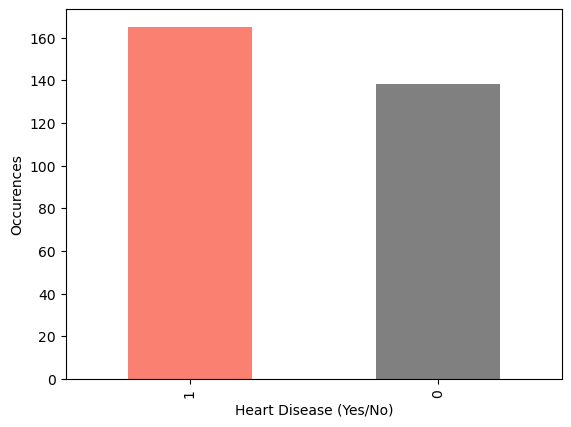

In [18]:
# Determine how many of each class there are
print(df["target"].value_counts())
df["target"].value_counts().plot(kind="bar", color=["salmon", "grey"], ylabel="Occurences", xlabel="Heart Disease (Yes/No)");

### Heart Disease Frequency Based on Sex

In [20]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

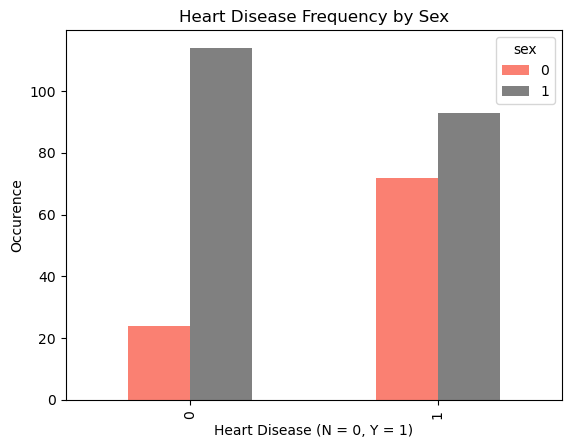

In [24]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", 'grey'], title="Heart Disease Frequency by Sex", xlabel="Heart Disease (N = 0, Y = 1)", ylabel="Occurence");

From the data above, we can infer that there is a higher prevalence of heart disease amongst females (~75%) than males (~50%). Overall prevalence across population ~ 62.5%

### Age vs Max Heart Rate for Heart Disease

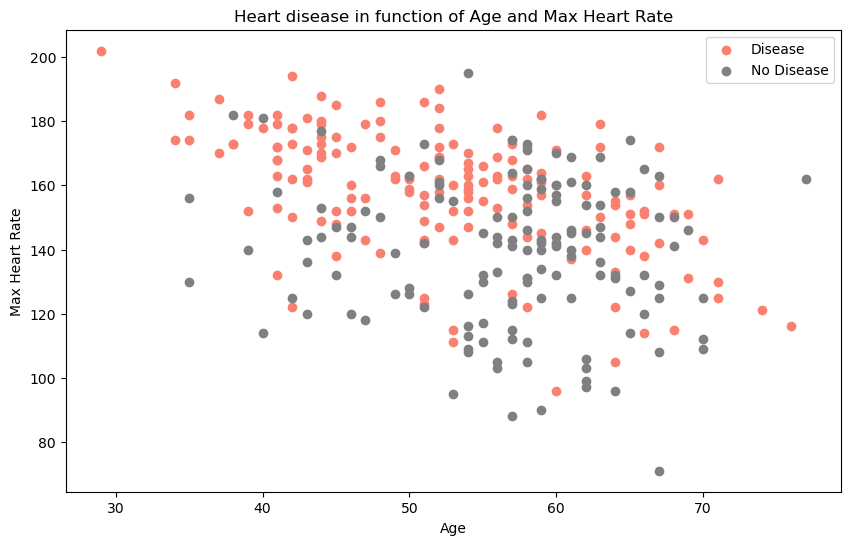

In [31]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(
    df.age[df.target==1],
    df.thalach[df.target==1],
    c="salmon"
);

# Scatter with negative examples
plt.scatter(
    df.age[df.target==0],
    df.thalach[df.target==0],
    c="grey"
);

# Add details
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

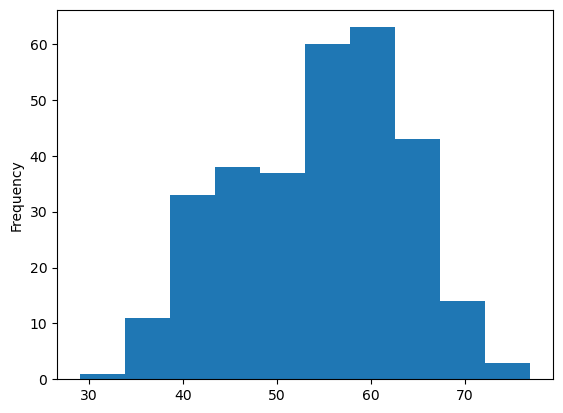

In [33]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

Findings: No human perceivable impact of max heart rate and age on heart disease

### Chest Pain Indication on Heart Disease

* cp chest pain type
    * typical angina
    * atypical angina
    * non-anginal
    * asymptomatic

In [71]:
# Compare heart disease presense with chest pain
cp_targ_comp = pd.crosstab(df["cp"], df["target"])
cp_targ_comp

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


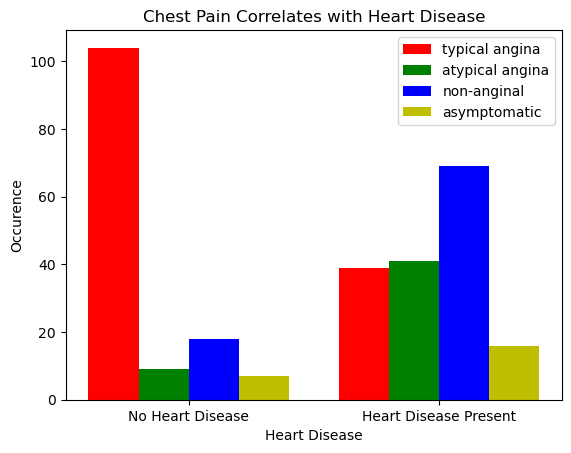

In [88]:
# Plot comparison
N = len(cp_targ_comp[0][:])
ind = np.arange(N)
width=0.2

fig, ax = plt.subplots()

ax.bar(ind, cp_targ_comp[0], width, color="r", label="typical angina")
ax.bar(ind+width, cp_targ_comp[1], width, color="g", label="atypical angina")
ax.bar(ind+width*2, cp_targ_comp[2], width, color="b", label="non-anginal")
ax.bar(ind+width*3, cp_targ_comp[3], width, color="y", label="asymptomatic")

ax.set(
    xticks= ind + width*1.5,
    xticklabels=["No Heart Disease", "Heart Disease Present"],
    xlabel="Heart Disease", 
    ylabel="Occurence", 
    title="Chest Pain Correlates with Heart Disease"
)

ax.legend();

Findings: There appears to be a strong correlation between chest pain and heart disease, but anginal heart disease appears to be poorly correlated.

### Create a correlation matrix between independant features

In [89]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


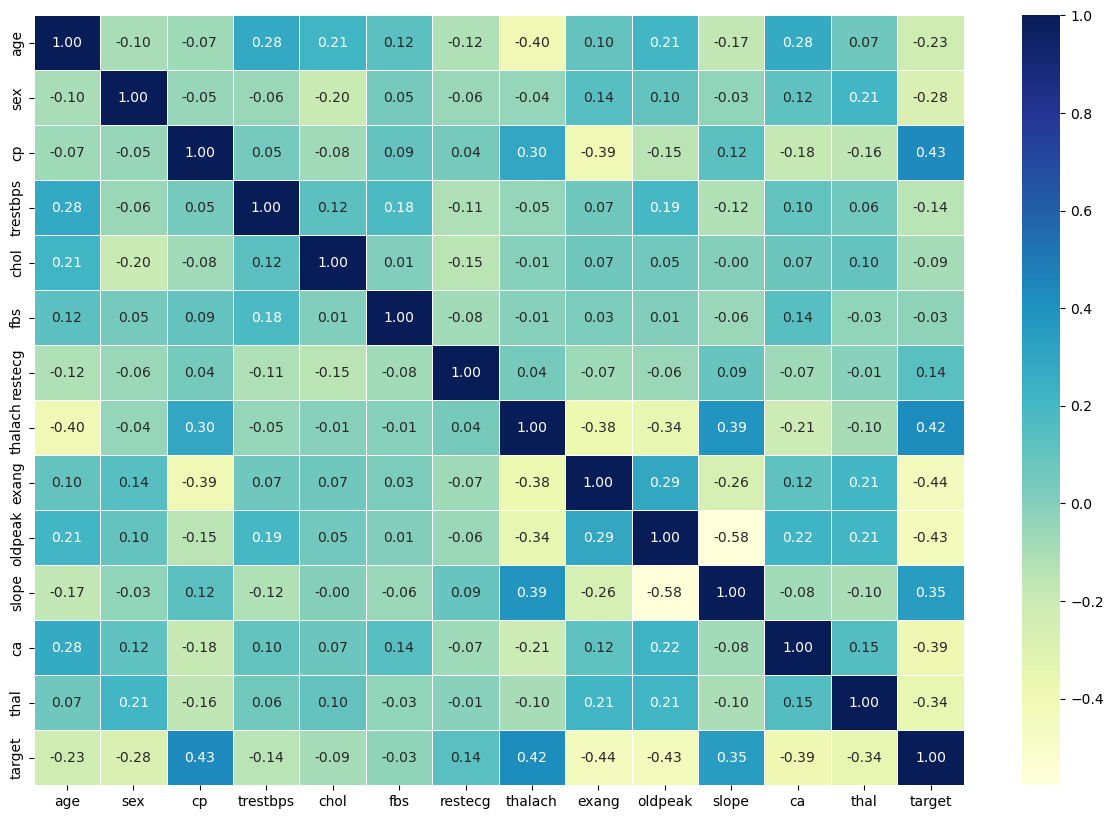

In [92]:
# Make correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="YlGnBu"
);

Summarized findings:

* Targets
    * 165 with heart disease
    * 138 without heart disease
* Sex appears to have an impact on heart disease occurence, with 50% of males with heart disease vs 75% of women
* No human perceivable impact of max heart rate and age on heart disease
* There appears to be a strong correlation between chest pain and heart disease, but anginal heart disease appears to be poorly correlated.

# 5. Modeling

### Cleaning the Data

Data has already been sanitised of string values and nulls have been removed by UCI

In [95]:
# Create features and target matrices
X = df.drop(["target"], axis=1)
y = df["target"]

In [98]:
# Split data into training and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Choosing a machine learning model

This is a classification problem, so we will leverage a few different options, including:
* K Nearest Neighbor
* Random Forest Classifier
* Logistic Regression

In [133]:
# Put models in a dictionary
models = {
    "Logisitc Regression": LogisticRegression,
    "K Nearest Neighbor": KNeighborsClassifier,
    "Random Forest": RandomForestClassifier
}

# Create function to iterate and try each model
def fit_predict_models(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)

    model_scores = {}
    
    # Loop through each and save scores
    for name, model in models.items():
        print(f"Evaluating {name}...")

        # Fit model
        clf = model()
        clf.fit(X_train, y_train)
        
        # Evaluate model and append score
        y_pred = clf.predict(X_test)
        model_scores[name] = clf.score(X_test, y_test)

    return model_scores

model_scores = fit_predict_models(models, X_train, X_test, y_train, y_test)

model_scores

Evaluating Logisitc Regression...
Evaluating K Nearest Neighbor...
Evaluating Random Forest...


c:\Users\jtass\anaconda3\envs\Heart-Disease-Classification\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logisitc Regression': 0.8852459016393442,
 'K Nearest Neighbor': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

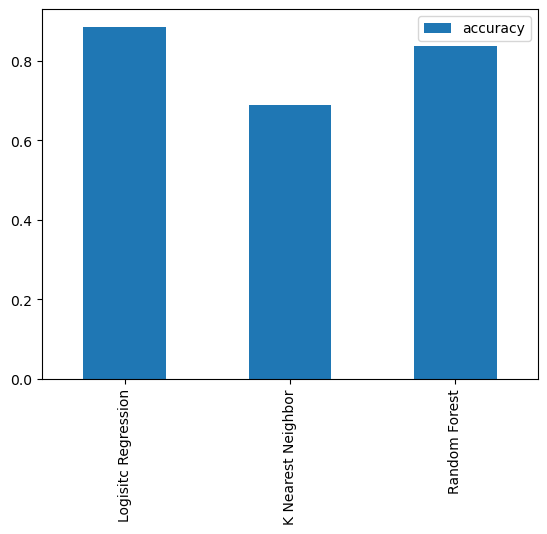

In [135]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Based on these findings, we will remove KNN from our potential models due to its poor performance.

### Tuning and Improving Our Model

Baseline model has been evaluated. Next steps:
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* AUC

In [ ]:
# Hyperparameter tuning
def tune_model(model, param_grid, X_train, y_train, rand_tune=1):
    # Set Random Seed
    np.random.seed(42)

    clf = model()

    if rand_tune:
        rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=10)
        rs_clf.fit(X_train, y_train)
        print(rs_clf.best_estimator_)
        return rs_clf

    else:
        gs_clf = GridSearchCV(clf, param_grid)
        gs_clf.fit(X_train, y_train)
        print(gs_clf.best_estimator_)
        return gs_clf
        

### Hyperparameter Tuning with RandomizedSearchCV

In [151]:
# Parameter grid for logistic regression
lr_param_grid = {
    "C": np.logspace(-4, 4, 20),
    "max_iter": np.arange(1000, 1500, 100),
    "solver": ["liblinear"]
}

# Parameter grid for Random Forest
rf_param_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "min_samples_split": np.arange(2, 4, 1),
    "min_samples_leaf": np.arange(1, 4, 1),
}

# Test with Randomized Search
lr_rand_clf = tune_model(LogisticRegression, lr_param_grid, X, y, rand_tune=1)
rf_rand_clf = tune_model(RandomForestClassifier, rf_param_grid, X, y, rand_tune=1)

LogisticRegression(C=0.23357214690901212, max_iter=1400, solver='liblinear')
RandomForestClassifier(min_samples_leaf=2, n_estimators=360)


In [152]:
# Check scores
print("Scores for Logisitc Regression model below:\n", classification_report(y_test, lr_rand_clf.predict(X_test)))
print("Scores for Random Forest model below:\n", classification_report(y_test, rf_rand_clf.predict(X_test)))

Scores for Logisitc Regression model below:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Scores for Random Forest model below:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        32

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



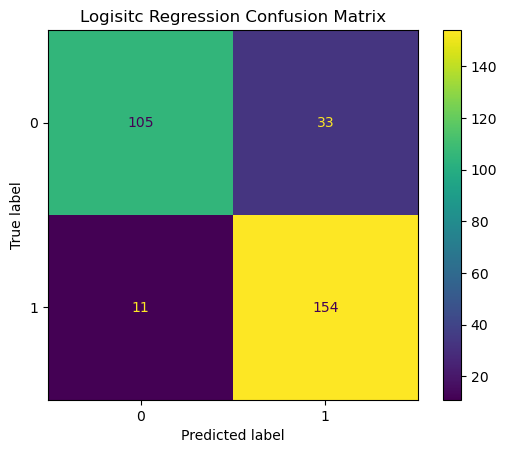

In [164]:
# Confusion matrix for logistic regression
ax = plt.subplot()
ax.set_title("Logisitc Regression Confusion Matrix")
ConfusionMatrixDisplay.from_estimator(lr_rand_clf, X, y, ax=ax);



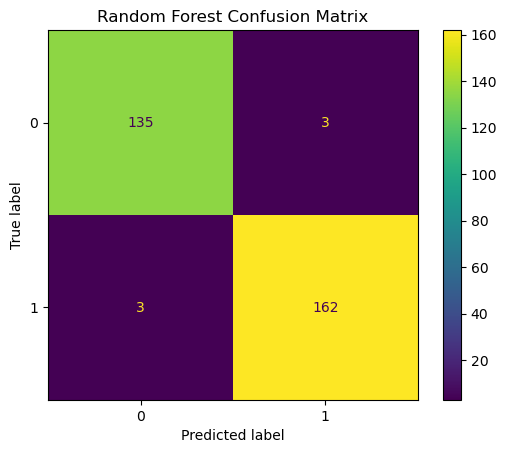

In [165]:
# Confusion matrix for Random Forest
ax = plt.subplot()
ax.set_title("Random Forest Confusion Matrix")
ConfusionMatrixDisplay.from_estimator(rf_rand_clf, X, y, ax=ax);

Based on results, moving forward with Random Forest model. Moving forward with grid search.

In [167]:
# Parameter grid for Random Forest
rf_param_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "min_samples_leaf": np.arange(1, 4, 1),
}

rf_grid_clf = tune_model(RandomForestClassifier, rf_param_grid, X, y, rand_tune=0)

RandomForestClassifier(min_samples_leaf=3, n_estimators=260)


In [168]:
# Evaluating tuned machine learning classifier
print("Scores for Random Forest model below:\n", classification_report(y_test, rf_grid_clf.predict(X_test)))

Scores for Random Forest model below:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.94      0.94      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [184]:
# Evaluating cross validated metrics

cv_score_dict = cross_validate(rf_grid_clf, X, y, scoring=["accuracy", "precision", "recall", "f1"])


In [186]:
# Calculate scores
accuracy = cv_score_dict["test_accuracy"].mean()
precision = cv_score_dict["test_precision"].mean()
recall = cv_score_dict["test_recall"].mean()
f1 = cv_score_dict["test_f1"].mean()

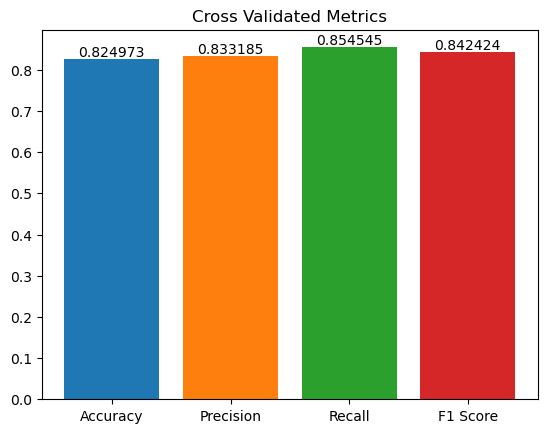

In [201]:
# Visualize cross-validated metrics

cv_metrics = pd.DataFrame(data={
    "Accuracy": accuracy, 
    "Precision": precision, 
    "Recall": recall,
    "F1 Score": f1
    }, index=[0])

fig, ax = plt.subplots()

acc_bar = ax.bar("Accuracy", cv_metrics["Accuracy"])
prec_bar = ax.bar("Precision", cv_metrics["Precision"])
rec_bar = ax.bar("Recall", cv_metrics["Recall"])
f1_bar = ax.bar("F1 Score", cv_metrics["F1 Score"])

ax.bar_label(acc_bar)
ax.bar_label(prec_bar)
ax.bar_label(rec_bar)
ax.bar_label(f1_bar)

ax.set_title("Cross Validated Metrics");

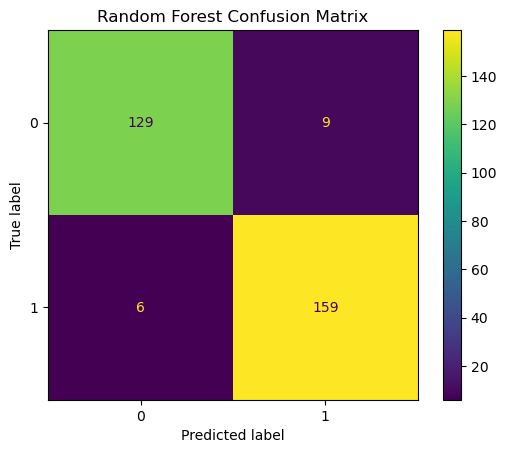

In [202]:
# Confusion matrix for Random Forest
ax = plt.subplot()
ax.set_title("Random Forest Confusion Matrix")
ConfusionMatrixDisplay.from_estimator(rf_grid_clf, X, y, ax=ax);

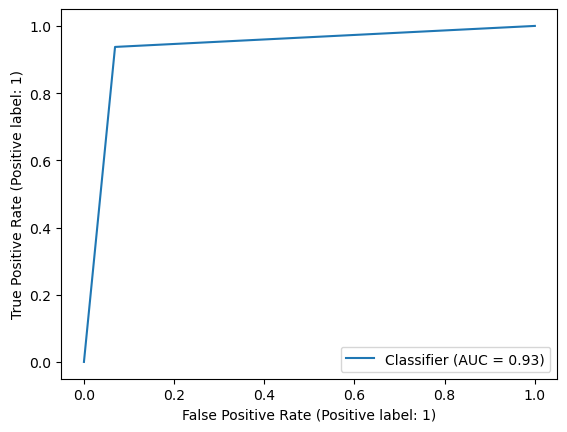

In [191]:
# Create ROC and calculate AUC

RocCurveDisplay.from_predictions(y_test, rf_grid_clf.predict(X_test));

### Feature Importance

Feature importance indicates the level to which a feature influences a certain classification. This differs per machine learning model.

This should generally match the feature correlation matrix, but this is a model-driven extrapolation and may indicate that it is well trained for future predictions.

For the Random Forest Classifier, this is calculated using the Mean Decrease in Impurity (MDI). This is a measure of the average gain in purity across all trees where this feature is used to split a node. Higher values imply greater importance in the prediction.

In [204]:
# Fit a new sample with the ideal hyperparameters from GridSearchCV
clf = RandomForestClassifier(min_samples_leaf=2, n_estimators=360)
clf.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=2, n_estimators=360)

In [217]:
# Use mean decrease in impurity (MDI) to calculate the feature importance for heart disease
feature_names = X.columns

forest_importances = pd.Series(clf.feature_importances_, index=feature_names)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

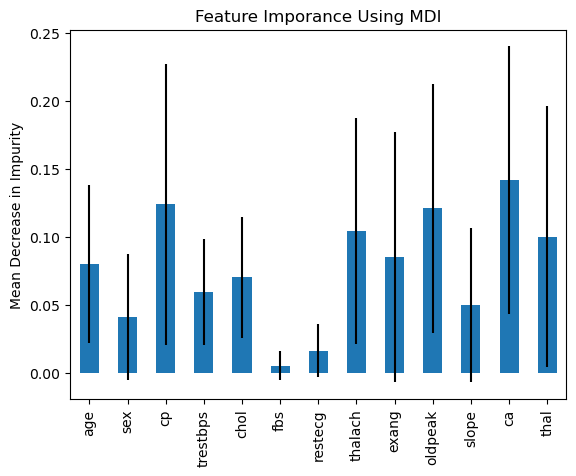

In [219]:
# Visualise feature importance

fig, ax = plt.subplots()

forest_importances.plot(kind="bar", yerr=std, ax=ax)

ax.set(
    title="Feature Imporance Using MDI",
    ylabel="Mean Decrease in Impurity"
);